# 10.4 멀티팩터 포트폴리오

앞에서 배웠던 팩터 이론들과 결합 방법들을 응용해 멀티팩터 포트폴리오를 구성해보겠습니다. 각 팩터에 사용되는 지표는 다음과 같습니다.



*   퀄리티: 자기자본이익률, 매출총이익, 영업활동현금흐름
*   밸류: PER, PBR, PSR, PCR 
*   모멘텀: 3개월 수익률, 6개월 수익률, 12개월 수익률



In [1]:
!pip install -U finance-datareader

     |████████████████████████████████| 48 kB 3.8 MB/s 


In [82]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import scipy.stats as ss

In [23]:
#  시가총액(Market Capitalization) : 주식 값의 총합  (주가*발행주식수)
df_krx = fdr.StockListing("KRX-MARCAP") # 시가총액 데이터셋
df_krx.iloc[63]

Code                  032640
Name                  LG유플러스
Market                 KOSPI
Dept                        
Close                  13150
ChangeCode                 2
Changes                 -250
ChagesRatio            -1.87
Open                   13450
High                   13500
Low                    13100
Volume               1372849
Amount           18202317450
Marcap         5741439397150
Stocks             436611361
MarketId                 STK
Name: 64, dtype: object

In [12]:
item_code = "035250"
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
tables = pd.read_html(item_url, encoding="cp949")
print(tables[3])
print(tables[3].iloc[[10,12], :0:-1].transpose())

       주요재무정보  최근 연간 실적                                최근 분기 실적            \
       주요재무정보   2019.12  2020.12   2021.12 2022.12(E)   2020.12   2021.03   
       주요재무정보    IFRS연결   IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  15201.00     4786   7884.00   13439.00   1313.00    974.00   
1        영업이익   5012.00    -4316   -527.00    3047.00   -761.00   -596.00   
2       당기순이익   3347.00    -2759   -106.00    2389.00   -333.00   -409.00   
3       영업이익률     32.97   -90.18     -6.68      22.67    -57.96    -61.19   
4        순이익률     22.02   -57.65     -1.34      17.78    -25.39    -41.98   
5   ROE(지배주주)      9.16    -7.92     -0.33       7.14     -7.92     -4.88   
6        부채비율     19.38    12.15     17.66        NaN     12.15     12.30   
7        당좌비율    274.17   324.65    270.31        NaN    324.65    312.24   
8         유보율   3538.24  3098.20   3103.60        NaN   3098.20   3059.44   
9      EPS(원)   1564.00    -1289    -49.00    1116.00   -156.00   -191.00   

In [ ]:

# url = 'http://companyinfo.stock.naver.com/v1/company/c1030001.aspx?code=005930'
# #http://companyinfo.stock.naver.com/v1/company/c1030001.aspx?cmp_cd=005930&fin_typ=0&freq_type=Y
# #url = url_tmpl % ('005930', '4', 'Y') # 삼성전자, 4(IFRS 연결), Y:년 단위

# dfs = pd.read_html(url, encoding="utf-8")
# #df = dfs[4]
# #df = df.set_index('주요재무정보')
# print(dfs)
# #df.head()
# #df.head(10) # 10개 항목만 표시(실제 32개 항목)

In [ ]:
# DF_SIZE = 100

# columns = ["Code", "Name", "매출액", "영업이익", "당기순이익", "영업활동현금흐름"]
# df = pd.DataFrame(columns=columns)
# for idx1, val1 in tqdm(df_krx.head(DF_SIZE).iterrows(), total=DF_SIZE):
#   item_code = val1["Code"]
#   item_url = f'http://companyinfo.stock.naver.com/v1/company/ajax/cF1001.aspx?cmp_cd={item_code}&fin_typ=0&freq_typ=Y'
#   #item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
#   tables = pd.read_html(item_url, encoding="cp949")
#   #tables = pd.read_html(item_url, encoding="utf-8")
#   print(tables)
#   if len(tables[3]) < 13: 
#     continue
#   for idx2, val2 in tables[3].iloc[[10,12], :0:-1].transpose().iterrows():
#     per = val2[10]
#     pbr = val2[12]
#     if (not pd.isna(per)) and (not pd.isna(pbr)):
#       df = df.append({
#           "Code": val1["Code"],
#           "Name": val1["Name"],
#           "PER": float(per),
#           "PBR": float(pbr)
#       }, ignore_index=True)
#       break
# df

In [20]:
item_code = "035250"
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
tables = pd.read_html(item_url, encoding="cp949")
#print(tables[3])
#print(tables[3].iloc[[10,12], :0:-1].transpose())
print(tables[3].iloc[:, 0].transpose())

0           매출액
1          영업이익
2         당기순이익
3         영업이익률
4          순이익률
5     ROE(지배주주)
6          부채비율
7          당좌비율
8           유보율
9        EPS(원)
10       PER(배)
11       BPS(원)
12       PBR(배)
13     주당배당금(원)
14     시가배당률(%)
15      배당성향(%)
Name: (주요재무정보, 주요재무정보, 주요재무정보), dtype: object


In [38]:
DF_SIZE = 200

columns = ["Code", "Name", "ROE", "GPA", "PER", "PBR"]
df = pd.DataFrame(columns=columns)
for idx1, val1 in tqdm(df_krx.head(DF_SIZE).iterrows(), total=DF_SIZE):
  item_code = val1["Code"]
  item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
  tables = pd.read_html(item_url, encoding="cp949")
  if len(tables[3]) < 13: 
    continue
  for idx2, val2 in tables[3].iloc[[1, 5, 10,12], :0:-1].transpose().iterrows():
    roe = val2[5]
    gpa = val2[1]
    per = val2[10]
    pbr = val2[12]
    if (not pd.isna(per)) and (not pd.isna(pbr)):
      df = df.append({
          "Code": val1["Code"],
          "Name": val1["Name"],
          "ROE": float(roe),
          "GPA": float(gpa),
          "PER": float(per),
          "PBR": float(pbr)
      }, ignore_index=True)
      break
df

  0%|          | 0/200 [00:00<?, ?it/s]

,Code,Name,ROE,GPA,PER,PBR
0,005930,삼성전자,13.92,138667.0,13.55,1.80
1,373220,LG에너지솔루션,6.91,12279.0,102.26,5.11
2,000660,SK하이닉스,16.84,42195.0,9.93,1.45
3,207940,삼성바이오로직스,8.21,1288.0,151.83,11.97
4,005935,삼성전자우,13.92,138667.0,13.55,1.80
...,...,...,...,...,...,...
193,139130,DGB금융지주,9.63,1365.0,3.15,0.29
194,067630,HLB생명과학,-18.43,-101.0,-23.93,4.83
195,017800,현대엘리베이,10.62,379.0,14.87,1.50
196,042700,한미반도체,34.59,357.0,18.06,5.40


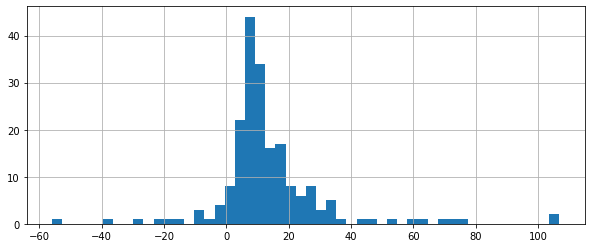

In [39]:
df["ROE"].hist(figsize=(10,4), bins=50)

In [97]:
# df_roe.drop(df_roe.tail(5).index,inplace=True)
# df_gpa.drop(df_gpa.head(5).index,inplace=True)
df_roe = df["ROE"][3:-3]
df_gpa = df["GPA"][3:-3]

In [99]:
df_roe = df["ROE"].rank()
df_gpa = df["GPA"].rank()

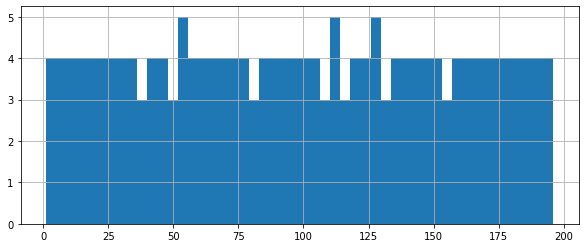

In [100]:
df_roe.hist(figsize=(10,4), bins=50)

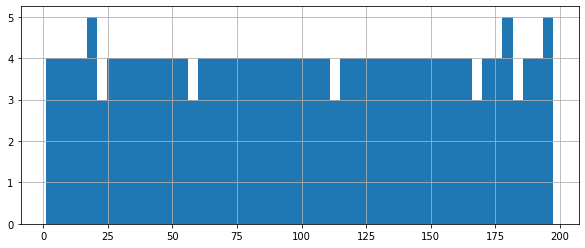

In [101]:
df_gpa.hist(figsize=(10,4), bins=50)

In [108]:
# df_roe.drop(df_roe.tail(5).index,inplace=True)
# df_gpa.drop(df_gpa.head(5).index,inplace=True)

df_roe = df["ROE"][3:-3]
df_gpa = df["GPA"][3:-3]
df_roe = df["ROE"].rank()
df_gpa = df["GPA"].rank()
df_roe = pd.Series(ss.zscore(df_roe))
df_gpa = pd.Series(ss.zscore(df_gpa))

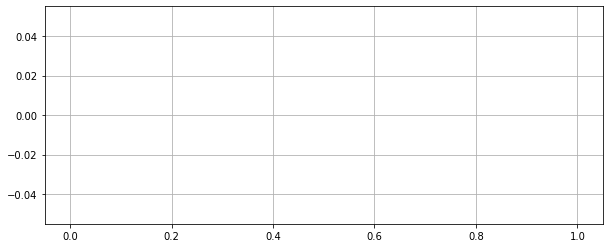

In [109]:
df_roe.hist(figsize=(10,4), bins=50)

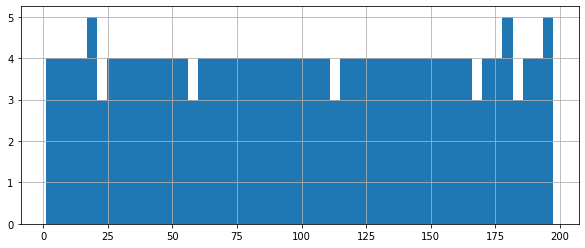

In [51]:
df_gpa.hist(figsize=(10,4), bins=50)

In [52]:
df_quality = df_roe*0.5+df_gpa*0.5

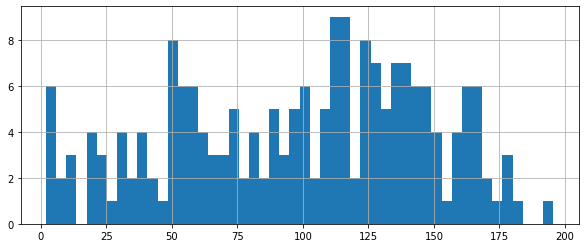

In [53]:
df_quality.hist(figsize=(10,4), bins=50)

In [104]:
df_per = df["PER"].rank()
df_pbr = df["PBR"].rank()
df_per = pd.Series(ss.zscore(df_per))
df_pbr = pd.Series(ss.zscore(df_pbr))
df_value = df_pbr*0.5+df_per*0.5

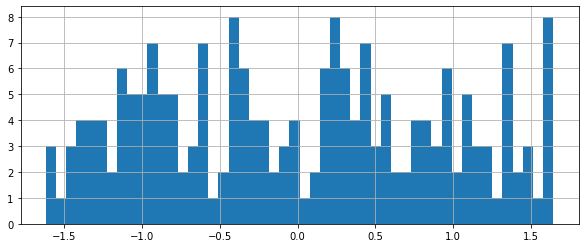

In [105]:
df_value.hist(figsize=(10,4), bins=50)